# Project Title
---

### Group Name

## Team members:
- Waseem Mohammed
- Abdulla Ebrahim


## 🔹 Introduction

Over the past two centuries, the world has seen dramatic improvements in both economic development and public health. Countries that were once struggling with widespread poverty and low life expectancy have, in many cases, achieved remarkable progress in raising living standards and extending lifespans. However, this progress has not been uniform across the globe.

This project explores the relationship between life expectancy, income (GNI per capita), and population trends across countries and over time. Using historical and projected data (1800–2050), we aim to understand how health outcomes are connected to economic conditions, and whether rising wealth always translates into longer lives.

## 🔹 Problem Statement

While global life expectancy has risen significantly since the 19th century, inequalities in health and wealth persist across countries and regions. Wealthier nations generally enjoy longer lives, but the relationship is not always straightforward. At lower income levels, small increases in wealth can dramatically improve health outcomes, while at higher income levels, gains in longevity tend to plateau.

This raises several questions:
- How strongly are income and life expectancy related over time?

- Do all countries follow the same pattern, or are there clear exceptions?

- What role does population growth play in shaping these trends?

- Can improvements in life expectancy be explained solely by income, or do other factors (policy, healthcare, social systems) play a critical role?

By addressing these questions, this project seeks to uncover patterns in the relationship between economic development, health, and population — and to provide evidence-based insights into why some countries thrive while others continue to lag behind.

## 🔹 Objectives

The main objectives of this project are:

1. Explore historical trends in life expectancy, income, and population across countries and regions.

2. Examine the relationship between GNI per capita and life expectancy, identifying whether the relationship is linear or nonlinear.

3. Compare across key countries, highlighting similarities, differences, and outliers.

4. Investigate the role of population size in shaping global averages and disparities.

5. Communicate insights clearly using visualizations that are easy to interpret for both technical and non-technical audiences.

## Exploratory Data Analysis (EDA):

### Data Info:
__Getting the data and exploring it (includes descriptive statistics)__

In [2]:
# Core data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats
import warnings

sns.set_palette("husl")
%matplotlib inline  


In [3]:

# ===LOAD DATA WITH EXACT PATHS ===
gni_path = "world-development-statistics/gni_per_cap_atlas_method_con2021.csv"
population_path = "world-development-statistics/population.csv"
life_path = "world-development-statistics/life_expectancy.csv"

# Load datasets
gni_df = pd.read_csv(gni_path)
population_df = pd.read_csv(population_path)
life_df = pd.read_csv(life_path)

print("Data loaded successfully!")
print(f"GNI data shape: {gni_df.shape}")
print(f"Population data shape: {population_df.shape}")
print(f"Life Expectancy data shape: {life_df.shape}")


Data loaded successfully!
GNI data shape: (191, 252)
Population data shape: (197, 302)
Life Expectancy data shape: (195, 302)


In [4]:
# === DATA EXPLORATION ===
print("\n=== FIRST LOOK AT EACH DATASET ===")

print("\nLife Expectancy data (first 3 rows):")
print(life_df.head(3))

print("\nGNI data (first 3 rows):")
print(gni_df.head(3))

print("\nPopulation data (first 3 rows):")
print(population_df.head(3))

# Check column names to understand structure
print(f"\nLife Expectancy columns: {life_df.columns.tolist()}")
print(f"GNI columns: {gni_df.columns.tolist()}")
print(f"Population columns: {population_df.columns.tolist()}")



=== FIRST LOOK AT EACH DATASET ===

Life Expectancy data (first 3 rows):
       country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1  ...   
1       Angola  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  ...   
2      Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  ...   

   2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
0  75.5  75.7  75.8  76.0  76.1  76.2  76.4  76.5  76.6  76.8  
1  78.8  79.0  79.1  79.2  79.3  79.5  79.6  79.7  79.9  80.0  
2  87.4  87.5  87.6  87.7  87.8  87.9  88.0  88.2  88.3  88.4  

[3 rows x 302 columns]

GNI data (first 3 rows):
       country   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0  Afghanistan  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0   
1       Angola  517.0  519.0  522.0  524.0  525.0  528.0  531.0  533.0  536.0   
2      Albania  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207

In [5]:
# Check if data is in wide format (countries × years)
print("=== DATA STRUCTURE ANALYSIS ===")

# Sample of what the data looks like
print("Life Expectancy data sample:")
print(life_df.head(3))

print("\nGNI data sample:")
print(gni_df.head(3))

# Check if 'country' is the first column and years are other columns
if 'country' in life_df.columns:
    print(f"✅ country column found. Number of countries: {life_df['country'].nunique()}")
    
    # Get year columns (assuming they're numeric)
    year_columns = [col for col in life_df.columns if col.isdigit()]
    print(f"✅ Year columns found: {len(year_columns)} years from {min(year_columns)} to {max(year_columns)}")

=== DATA STRUCTURE ANALYSIS ===
Life Expectancy data sample:
       country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1  ...   
1       Angola  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  ...   
2      Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  ...   

   2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
0  75.5  75.7  75.8  76.0  76.1  76.2  76.4  76.5  76.6  76.8  
1  78.8  79.0  79.1  79.2  79.3  79.5  79.6  79.7  79.9  80.0  
2  87.4  87.5  87.6  87.7  87.8  87.9  88.0  88.2  88.3  88.4  

[3 rows x 302 columns]

GNI data sample:
       country   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0  Afghanistan  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0   
1       Angola  517.0  519.0  522.0  524.0  525.0  528.0  531.0  533.0  536.0   
2      Albania  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0   

   ... 

In [6]:
# Check for missing values
print("=== MISSING VALUES ===")
print("Life Expectancy missing values:")
print(life_df.isnull().sum())

print("\nGNI missing values:")
print(gni_df.isnull().sum())

# Check for duplicates
print("\n=== DUPLICATE CHECK ===")
print(f"Life Expectancy duplicates: {life_df.duplicated().sum()}")
print(f"GNI duplicates: {gni_df.duplicated().sum()}")

# Basic statistics for numeric columns
print("\n=== BASIC STATISTICS ===")
# For wide format data, we need to look at the values across years
# Examine one year column as example
if '2020' in life_df.columns:
    print("Life Expectancy 2020 stats:")
    print(life_df['2020'].describe())

=== MISSING VALUES ===
Life Expectancy missing values:
country    0
1800       9
1801       9
1802       9
1803       9
          ..
2096       9
2097       9
2098       9
2099       9
2100       9
Length: 302, dtype: int64

GNI missing values:
country    0
1800       1
1801       1
1802       1
1803       1
          ..
2046       1
2047       1
2048       1
2049       1
2050       1
Length: 252, dtype: int64

=== DUPLICATE CHECK ===
Life Expectancy duplicates: 0
GNI duplicates: 0

=== BASIC STATISTICS ===
Life Expectancy 2020 stats:
count    186.000000
mean      72.446237
std        6.753106
min       52.000000
25%       67.425000
50%       73.200000
75%       77.000000
max       84.900000
Name: 2020, dtype: float64


### Data Handling: 
__Cleaning, transforming, and combining data__

In [7]:
# Reshaping
def reshape_wide_to_long(df, value_name):
    """
    Convert from wide format (countries × years) to long format
    """
    # Melt the dataframe: keep country, melt year columns
    long_df = df.melt(id_vars=['country'], 
                     var_name='Year', 
                     value_name=value_name)
    
    # Convert Year to integer
    long_df['Year'] = long_df['Year'].astype(int)
    
    # Remove rows with missing values
    long_df = long_df.dropna()
    
    print(f"✅ {value_name}: {long_df['country'].nunique()} countries, {long_df['Year'].nunique()} years")
    return long_df

# Apply to all datasets
print("=== RESHAPING DATA ===")
life_exp_long = reshape_wide_to_long(life_df, 'Life_Expectancy')
gni_long = reshape_wide_to_long(gni_df, 'GNI_per_Capita')
population_long = reshape_wide_to_long(population_df, 'Population')

=== RESHAPING DATA ===
✅ Life_Expectancy: 195 countries, 301 years
✅ GNI_per_Capita: 191 countries, 251 years
✅ Population: 197 countries, 301 years


In [8]:
# Merge step by step
print("=== MERGING DATASETS ===")

# First merge: Life Expectancy + GNI
merged_df = pd.merge(life_exp_long, gni_long, on=['country', 'Year'], how='inner')

# Second merge: Add Population
merged_df = pd.merge(merged_df, population_long, on=['country', 'Year'], how='inner')

print(f"✅ Merged dataset shape: {merged_df.shape}")
print(f"✅ Countries in merged data: {merged_df['country'].nunique()}")
print(f"✅ Years covered: {merged_df['Year'].min()} to {merged_df['Year'].max()}")

# Quick check
print("\n=== MERGED DATA SAMPLE ===")
print(merged_df)

=== MERGING DATASETS ===
✅ Merged dataset shape: (46604, 5)
✅ Countries in merged data: 190
✅ Years covered: 1800 to 2050

=== MERGED DATA SAMPLE ===
                    country  Year  Life_Expectancy GNI_per_Capita Population
0               Afghanistan  1800             28.2          207.0      3.28M
1                    Angola  1800             27.0          517.0      1.57M
2                   Albania  1800             35.4          207.0       400k
3      United Arab Emirates  1800             30.7          738.0      40.2k
4                 Argentina  1800             33.2          794.0       534k
...                     ...   ...              ...            ...        ...
46599                 Samoa  2050             74.3           6440       320k
46600                 Yemen  2050             72.2           1730      55.3M
46601          South Africa  2050             70.9           9220      73.5M
46602                Zambia  2050             69.8           1520      37.5M
466

In [9]:
#Converting string to Integer and float
def to_int(input1):
    """convert string (like 12k, 13.4k) to int """
    if type(input1) == "int":
        return input1
    if "k" in input1:
        return int(float(input1[:-1]) * 1000)
    elif "M" in input1:
        return int(float(input1[:-1]) * 1_000_000)
    elif "B" in input1:
        return int(float(input1[:-1]) * 1_000_000_000)
    else:
        return(int(input1))
def to_float(input1):
    """convert string (like 12k, 13.4k) to int """
    if type(input1) == "float":
        return input1
    if "k" in input1:
        return float(input1[:-1]) * 1000
    elif "M" in input1:
        return float(input1[:-1]) * 1_000_000
    elif "B" in input1:
        return float(input1[:-1]) * 1_000_000_000
    else:
        return(float(input1))

In [10]:
'''Data tyoe check for all columns'''
print(merged_df.columns)
result = []
for value1 in merged_df['GNI_per_Capita']:
    result.append(to_float(str(value1)))
merged_df["GNI_per_Capita"] = result
result = []
for value1 in merged_df['Population']:
    result.append(to_int(str(value1)))
merged_df["Population"] = result
print(merged_df.dtypes)

Index(['country', 'Year', 'Life_Expectancy', 'GNI_per_Capita', 'Population'], dtype='object')
country             object
Year                 int64
Life_Expectancy    float64
GNI_per_Capita     float64
Population           int64
dtype: object


### Analysis: 
__Answering the objectives through data analysis__



In [11]:
print(merged_df.dtypes)
print(merged_df.columns)

country             object
Year                 int64
Life_Expectancy    float64
GNI_per_Capita     float64
Population           int64
dtype: object
Index(['country', 'Year', 'Life_Expectancy', 'GNI_per_Capita', 'Population'], dtype='object')


In [12]:
merged_df.isnull().sum()

country            0
Year               0
Life_Expectancy    0
GNI_per_Capita     0
Population         0
dtype: int64

In [13]:
merged_df.describe(include="all")

,country,Year,Life_Expectancy,GNI_per_Capita,Population
count,46604,46604.000000,46604.000000,46604.000000,4.660400e+04
unique,190,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN
freq,251,NaN,NaN,NaN,NaN
mean,NaN,1925.536220,47.719158,5170.894837,1.800181e+07
std,NaN,72.374689,18.642026,12818.065287,8.464023e+07
min,NaN,1800.000000,1.010000,28.000000,2.260000e+03
25%,NaN,1863.000000,32.000000,402.000000,4.590000e+05
50%,NaN,1926.000000,39.100000,884.500000,2.300000e+06
75%,NaN,1988.000000,66.300000,3190.000000,8.690000e+06


## ✅ Selection Strategy

We’ll choose 6 countries to represent three tiers of development (based on GNI per capita, population, and life expectancy).
### High tier (wealthy & long life expectancy)

- United States (large population, high GNI, high life expectancy)
- Japan (smaller population than US, but very high life expectancy and wealth)

### Medium tier (moderate income, growing life expectancy)

- Brazil (emerging economy, middle-income, rising life expectancy)
- India (huge population, middle-to-lower GNI, steady progress in life expectancy)

### Low tier (low GNI, shorter life expectancy)

- Nigeria (large population, low GNI, lower life expectancy trends)
- Ethiopia (smaller population, low GNI, also among lowest life expectancies historically)

## ✅ Why these countries?

- They span all world regions (North America, Asia, South America, Africa).

- They cover all levels of development (rich, middle, poor).

- They have data from 1800 to 2050 (not every dataset has complete data for every country — but these do).


In [34]:
focus_countries = ["United States", "Japan", "Brazil", "India", "Nigeria", "Ethiopia"]
merged_df[merged_df["country"].isin(focus_countries)].groupby("country").agg({"Life_Expectancy": ["mean","min","max"],"GNI_per_Capita":["mean","min","max"],"Population":["mean","min","max"]})

Life_Expectancy              GNI_per_Capita                    \
                         mean    min   max           mean     min       max   
country                                                                       
Brazil              46.775697  26.20  81.6    2904.382470   358.0   14300.0   
Ethiopia            39.492430   4.00  76.7     547.163347   153.0    2360.0   
India               41.131912   9.31  76.2     967.525896   397.0    5340.0   
Japan               55.408765  30.80  88.4   18798.127490  2290.0   71800.0   
Nigeria             43.216733  17.30  74.2    1080.135458   494.0    3240.0   
United States       58.263347  31.00  83.5   26846.494024  3120.0  116000.0   

                 Population                         
                       mean        min         max  
country                                             
Brazil         7.484231e+07    2500000   231000000  
Ethiopia       4.426892e+07   12000000   215000000  
India          5.770080e+08  201000000  1670000000  
Japan          7.164861e+07   28000000   128000000  
Nigeria        7.320199e+07   12100000   377000000  
United States  1.444551e+08    6000000   375000000

In [39]:
'''Filtering the merged_df to only 6 countries'''
# Step 1: Select the 6 representative countries
selected_countries = ["United States", "Japan", "Brazil", "India", "Nigeria", "Ethiopia"]

# Step 2: Filter the merged_df to only these countries
filtered_df = merged_df[merged_df["country"].isin(selected_countries)].copy()

# Step 3: Confirm the size and countries
print("✅ Filtered dataset shape:", filtered_df.shape)
print("✅ Countries in filtered dataset:", filtered_df["country"].unique())
print("✅ Years covered:", filtered_df["Year"].min(), "to", filtered_df["Year"].max())

# Step 4: Preview sample rows
print(filtered_df.head(10))

✅ Filtered dataset shape: (1506, 5)
✅ Countries in filtered dataset: ['Brazil' 'Ethiopia' 'India' 'Japan' 'Nigeria' 'United States']
✅ Years covered: 1800 to 2050
           country  Year  Life_Expectancy  GNI_per_Capita  Population
22          Brazil  1800             32.0           379.0     2500000
53        Ethiopia  1800             29.7           342.0    12000000
76           India  1800             25.4           486.0   201000000
85           Japan  1800             36.4          2300.0    28000000
121        Nigeria  1800             30.4           608.0    12100000
173  United States  1800             39.4          3150.0     6000000
206         Brazil  1801             32.0           379.0     2570000
237       Ethiopia  1801             29.7           342.0    12000000
260          India  1801             25.4           486.0   201000000
269          Japan  1801             36.4          2300.0    28100000


In [40]:
filtered_df.shape

(1506, 5)

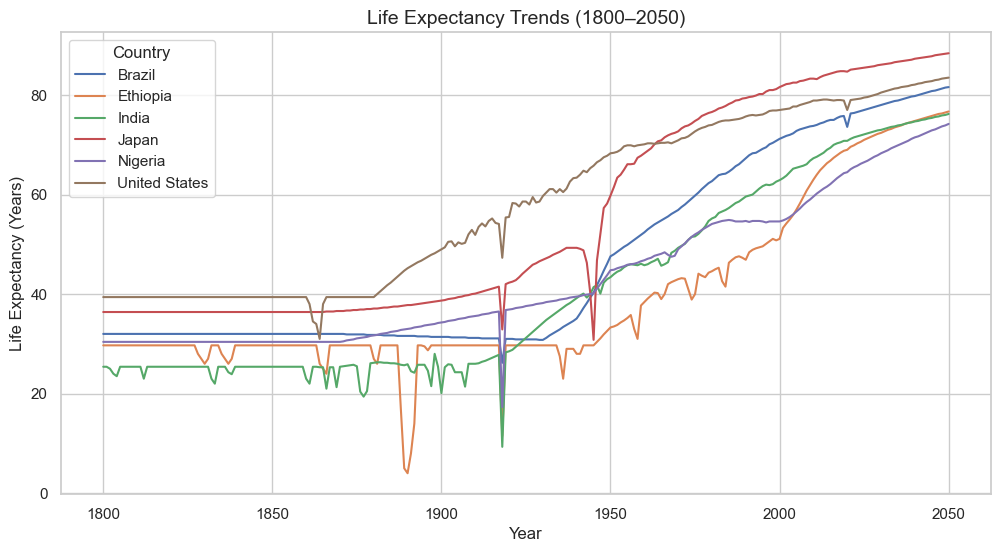

In [42]:
# Set style for seaborn
sns.set_theme(style="whitegrid", palette="deep")

# ==============================
# 1. Life Expectancy over Time (Line Chart)
# ==============================
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x="Year", y="Life_Expectancy", hue="country")
plt.title("Life Expectancy Trends (1800–2050)", fontsize=14)
plt.ylabel("Life Expectancy (Years)")
plt.xlabel("Year")
plt.legend(title="Country")
plt.show()


__👉 Interpretation:

- In the 1800s, all countries had very low life expectancy (~25–40 years).
- Around the 20th century, USA and Japan pulled ahead due to better medicine, industrialization, and public health.
- Brazil and India show steady improvement, but lag behind.
- Nigeria and Ethiopia improve much later and slower → linked to poverty, colonialism, and weaker healthcare infrastructure.

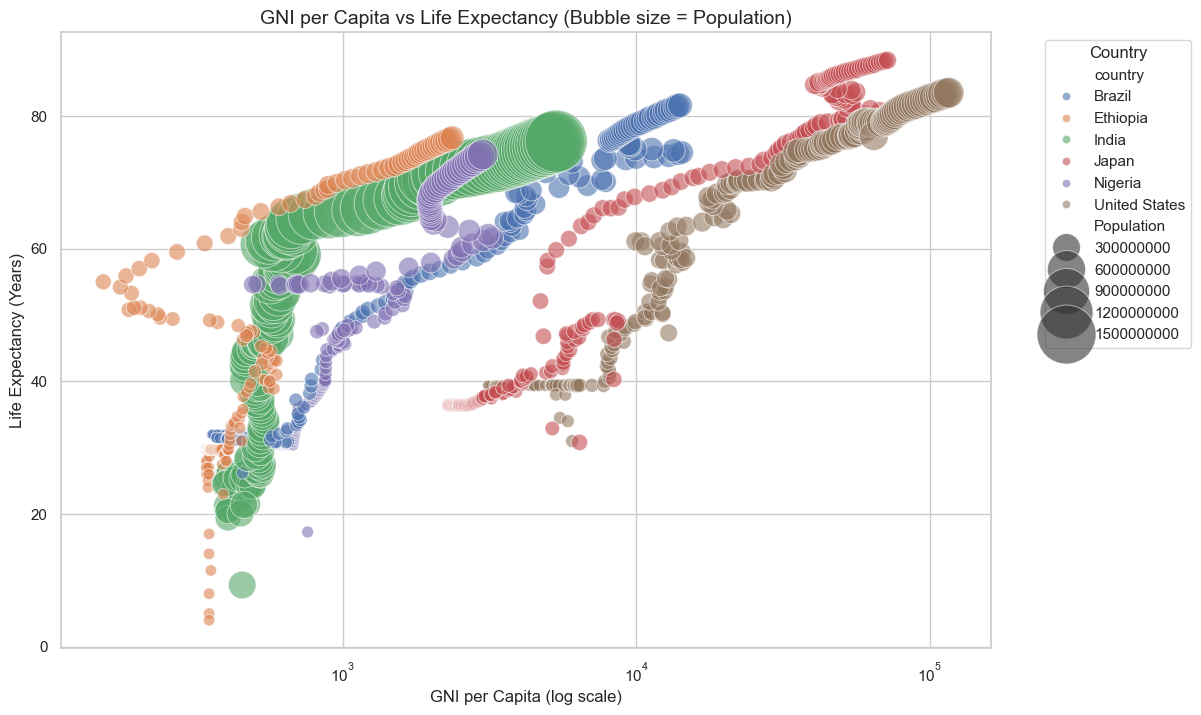

In [91]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=filtered_df, 
    x="GNI_per_Capita", 
    y="Life_Expectancy", 
    size="Population", 
    hue="country", 
    alpha=0.6, 
    sizes=(50, 2000)  # control bubble sizes
)
plt.xscale("log")
plt.title("GNI per Capita vs Life Expectancy (Bubble size = Population)", fontsize=14)
plt.xlabel("GNI per Capita (log scale)")
plt.ylabel("Life Expectancy (Years)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

__🔢 1. Explaining the log scale (10³, 10⁴, etc.)__
When you see 10³, 10⁴, 10⁵ on a log scale:
- 10³ = 1,000
- 10⁴ = 10,000
- 10⁵ = 100,000
and so on.
- On a normal (linear) scale, the axis increases like this: 0, 10,000, 20,000, 30,000…
- On a logarithmic (log) scale, it increases by powers of 10: 1,000 → 10,000 → 100,000 → 1,000,000.

##### “Since GNI per capita varies a lot (from hundreds in Ethiopia to tens of thousands in the USA), we use a log scale so the data isn’t squished together. The log scale lets us see patterns across both poor and rich countries more clearly.”

##### “Each step up (10³ → 10⁴) means multiplying by 10, not just adding the same amount.”

##### “This helps show relationships, like how life expectancy rises quickly at first with income, then levels off.”

__👉 Interpretation:__
- India and Nigeria → very large bubbles, lower life expectancy.
- Japan and USA → smaller bubbles, but very high life expectancy.
- Brazil → middle path.

__**Wealth and health move together**:__
- Countries with higher GNI per capita almost always have higher life expectancy.
- Population adds urgency:
    - Large bubbles at the bottom-left (e.g., Nigeria, India historically) show billions of people living shorter lives with lower income.
    - This means global inequality isn’t just about averages — it’s about how many lives are impacted.
- Diminishing returns: At very high incomes (like USA vs Japan), extra wealth doesn’t always give big improvements in life expectancy.

__This chart shows wealth, health, and population size in one view.__

- Countries like USA and Japan quickly reached high life expectancy as incomes rose.
- Brazil and India show a middle path — life expectancy improves but not as fast.
- Nigeria and Ethiopia are clustered at the lower end → high poverty = low life expectancy.

##### Key finding: Beyond ~$20,000 per person, more money doesn’t add much life expectancy (diminishing returns).

__🗝️Why these patterns happened (historical context) and why the lines look the way they do:__

##### USA & Japan (High GNI & Life Expectancy):
- Industrial Revolution, modern healthcare, antibiotics, sanitation, strong economies.
- Japan especially saw big jumps post-WWII due to rapid modernization.

##### Brazil & India (Middle GNI & Life Expectancy):
- Improved life expectancy after independence, better public health, but still issues with inequality and poverty.

##### Nigeria & Ethiopia (Low GNI & Life Expectancy):
- Colonial legacy, political instability, lower healthcare access.
- Higher child mortality rates delayed gains in life expectancy.
- Only recent improvements with vaccinations, international aid, and infrastructure.



C:\Users\wasee\AppData\Local\Temp\ipykernel_3708\1433109232.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_life, x="country", y="Life_Expectancy", palette="viridis")


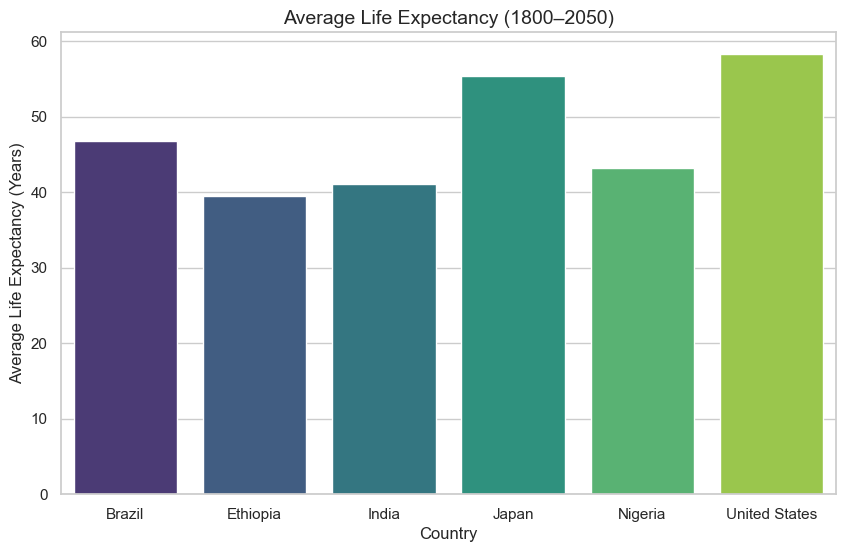

In [79]:
avg_life = filtered_df.groupby("country")["Life_Expectancy"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_life, x="country", y="Life_Expectancy", palette="viridis")
plt.title("Average Life Expectancy (1800–2050)", fontsize=14)
plt.ylabel("Average Life Expectancy (Years)")
plt.xlabel("Country")
plt.show()

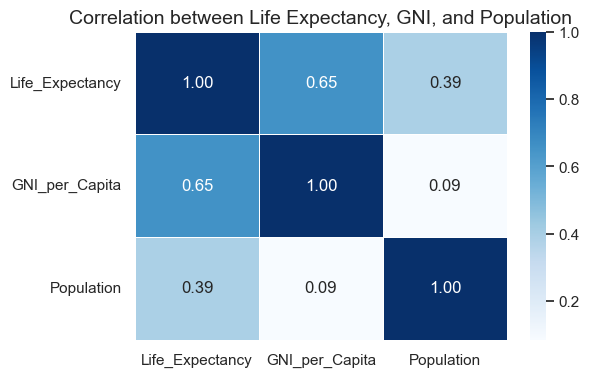

In [74]:
# Select only numeric columns of interest
corr = fil[["Life_Expectancy", "GNI_per_Capita", "Population"]].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Correlation between Life Expectancy, GNI, and Population", fontsize=14)
plt.show()

__👉 Interpretation:__

- Close to +1 → strong positive relationship (when one goes up, the other goes up).
- Close to -1 → strong negative relationship (when one goes up, the other goes down).
- Close to 0 → weak or no linear relationship.

For example, you’d expect:

- Life Expectancy ↔ GNI → strong positive correlation.
- Life Expectancy ↔ Population → weak correlation (not very direct).

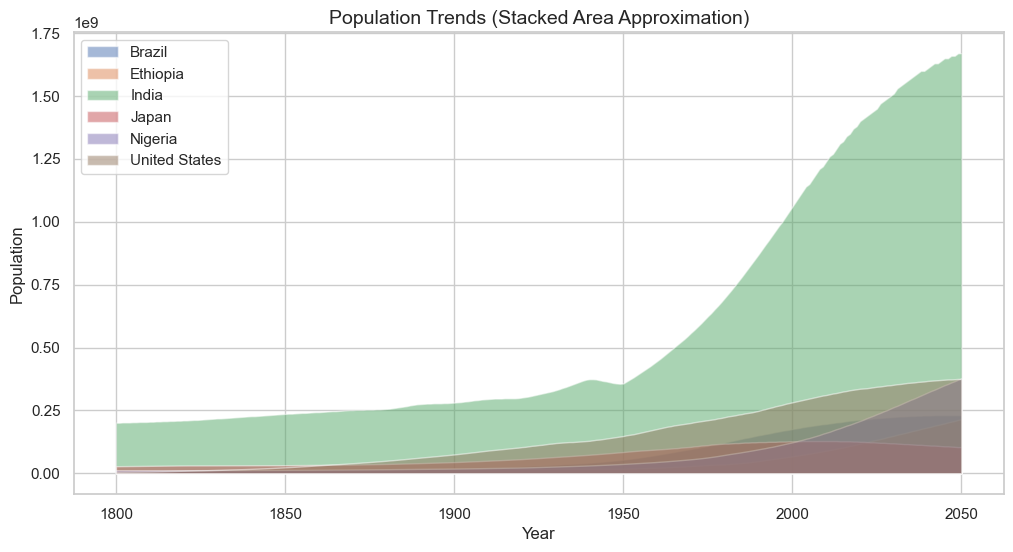

In [85]:
plt.figure(figsize=(12,6))
for c in filtered_df['country'].unique():
    country_data = filtered_df[filtered_df['country']==c]
    plt.fill_between(country_data['Year'], country_data['Population'], label=c, alpha=0.5)

plt.title("Population Trends (Stacked Area Approximation)", fontsize=14)
plt.ylabel("Population")
plt.xlabel("Year")
plt.legend(loc="upper left")
plt.show()

## 🔑 Key Insights from Analysis
__1. Wealth and Health Connection__
- Higher GNI per capita strongly relates to higher life expectancy.
- But after a certain income level, extra wealth brings smaller improvements (USA vs Japan).

__2. Population Dynamics Matter__
- Low-GNI countries (Nigeria, Ethiopia) → rapid population growth + lower life expectancy.
- High-GNI countries (Japan, USA) → slower or declining growth, but longer lives.

__3. Middle-GNI Countries are “Catch-Up Economies”__
- India and Brazil → moderate income, improving steadily in both life expectancy and population balance.
- They represent a transition zone between “developing” and “developed.”

__4. Trade-offs Exist__
- Large populations strain resources, slowing per capita income growth.
 -Rich countries face aging populations, which brings economic challenges despite wealth.

## 📌 Conclusion

*From our analysis of GNI per Capita, Population, and Life Expectancy (1800–2050) across countries like USA, Japan, Brazil, India, Nigeria, and Ethiopia:*

__1. Strong correlation between wealth and health__
- Countries with higher GNI per capita (USA, Japan) consistently achieve higher life expectancy.
- However, after a certain point (~$30,000), wealth brings diminishing returns — lifestyle and healthcare quality matter more.

__2. Population dynamics shape economic outcomes__
- Fast-growing populations (India, Nigeria, Ethiopia) make it difficult to raise average income (GNI per capita).
- In contrast, slower population growth in Japan and USA has supported sustained wealth per person.

__3. Health improvements drive long-term growth__
- Countries that invested in healthcare and education earlier (Japan, USA) gained not only longer lives but also more productive economies.
- Late starters (Nigeria, Ethiopia) show progress but still lag in both wealth and life expectancy.



## 📌 Recommendations

*Based on the findings, here are clear policy-level and societal recommendations:*

__1. For Low-GNI Countries (Nigeria, Ethiopia):__
- Invest in healthcare & education: Small improvements in life expectancy can yield large productivity and economic gains.
- Family planning programs: Managing fertility rates helps balance population growth with economic resources.
- Diversify economy: Move beyond agriculture into manufacturing/services to boost GNI.

__2. For Middle-GNI Countries (India, Brazil):__
- Strengthen healthcare systems: Preventive care and universal access can push life expectancy higher.
- Urbanization with planning: Manage rapid population growth with infrastructure (transport, housing, sanitation).
- Leverage demographic dividend: Large young populations can drive economic growth if educated and employed.

__3. For High-GNI Countries (USA, Japan):__
- Focus on quality of life, not just wealth: Japan proves lifestyle factors (diet, healthcare access) extend life beyond what money alone achieves.
- Address aging populations: Policies for elderly care and immigration can balance shrinking workforces.
- Promote sustainable growth: High income does not guarantee longer life; social equity and healthcare access matter.